### 1. Vertical Line Test

Create two graphs, one that passes the vertical line test and one that does not.

In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

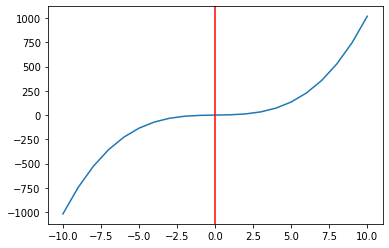

In [3]:
# plot a line that passes the vertical line test
x = np.arange(-10, 11)
y = x**3 + 2*x
plt.plot(x, y)  
plt.axvline(x=0, color='r');

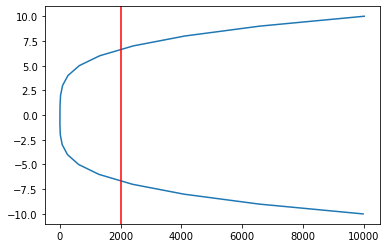

In [4]:
# plot a line that doesn't pass the vertical line test
y = np.arange(-10, 11)
x = y**4 + 2*y
plt.plot(x, y)  
plt.axvline(x=2000, color='r');

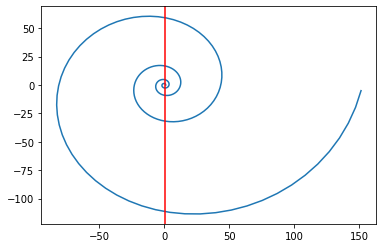

In [5]:
# plot a line that doesn't pass the vertical line test
theta = np.arange(0, 8*np.pi, 0.1)

for c in np.arange(0, 1):
    x = 1*np.cos(theta + c)*np.exp(.2*theta)
    y = 1*np.sin(theta + c)*np.exp(.2*theta)
    p1 = plt.plot(x, y)
plt.axvline(x=.5, color='r');

Why are graphs that don't pass the vertical line test not considered "functions?"

In [6]:
# A function cannot have the same input 
# (x value/domain value) mapped to multiple outputs
# (y value/co-domain value).

### 2. Functions as Relations

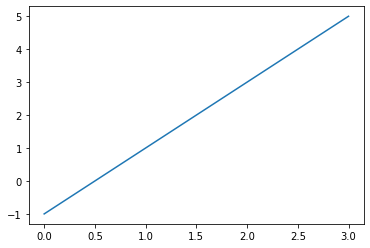

In [7]:
# plot the function f(x) = 2x + 3
x = np.arange(-2, 2)
y = 2*x + 3
plt.plot(y);

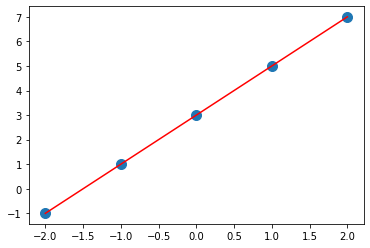

In [8]:
# Plot the following relation:
# (-2, -1), (-1, 1), (0, 3), (1 ,5), (2 ,7)
x = np.array([-2, -1, 0, 1, 2])
y = np.array([-1, 1, 3, 5, 7])
plt.scatter(x, y, s=100)
plt.plot(x, y, color='r');

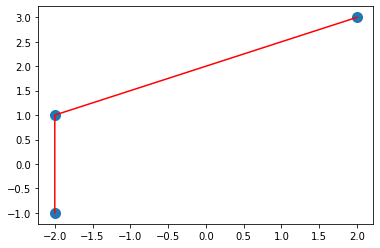

In [9]:
# Relation 1: (-2, -1), (-2, 1), (2, 3)
x = np.array([-2, -2, 2])
y = np.array([-1, 1, 3])
plt.scatter(x, y, s=100)
plt.plot(x,y, color='r');

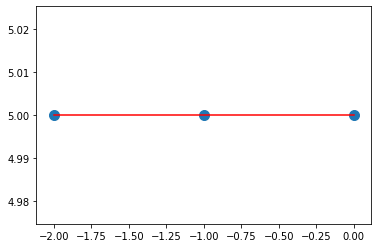

In [10]:
# Relation 2: (-2, 5), (-1, 5), (0, 5)
# no two different y values mapped to same x value!
x = np.array([-2, -1, 0])
y = np.array([5, 5, 5])
plt.scatter(x, y, s=100)
plt.plot(x,y, color='r');

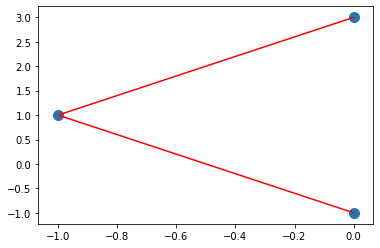

In [11]:
# Relation 3: (0, -1), (-1, 1), (0, 3)
x = np.array([0, -1, 0])
y = np.array([-1, 1, 3])
plt.scatter(x, y, s=100)
plt.plot(x,y, color='r');

### 3. Functions as a mapping between dimensions

[6, 8, 10, 12]


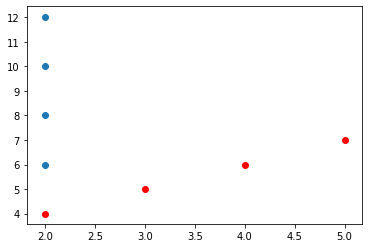

In [12]:
# plot the function g(x1, x2) = x1 + x2

def g(z):
    return z[0] + z[1]
x=[2,2,2,2]
y=[]
for point in [(2,4), (3,5), (4,6), (5,7)]:
    plt.scatter(x=point[0], y=point[1], c='r');
    y.append(g(point))

print(y)
plt.scatter(x, y);

[22, 32, 42] [25, 30, 35]


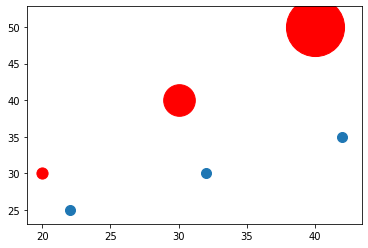

In [13]:
# plot the function h(z1, z2, z3) = (z1 + 2, z2-z3)

def h(z):
    return z[0] + 2, z[1]-z[2]
x=[]
y=[]
for point in [(20,30,5), (30,40,10), (40,50,15)]:
    plt.scatter(x=point[0], 
                y=point[1], 
                s=point[2]**3, 
                c='r');
    x.append(h(point)[0])
    y.append(h(point)[1])

print(x, y)
plt.scatter(x,y, s=100);

### 4. Vector Transformations

In [14]:
# write a function to imitate the lecture notebook:
def f(vect):
    x1=vect[0][0]
    x2=vect[1][0]
    row1 = np.array([2*x1 + x2])
    row2 = np.array([-3*x2 + x1])
    output_vector=np.array([row1, row2])
    return output_vector

In [15]:
# Apply f to x-axis unit vector 
i_hat=np.array([[1],[0]])
a=f(i_hat)
a

array([[2],
       [1]])

In [16]:
# Apply f to y-axis unit vector
j_hat=np.array([[0],[1]])
b=f(j_hat)
b

array([[ 1],
       [-3]])

In [17]:
# Turn those into a matrix 
# (notice this cool np trick for combining column vectors)
T = np.column_stack([a,b])
T

array([[ 2,  1],
       [ 1, -3]])

In [18]:
# Turn those into a dataframe, for comparison
pd.DataFrame(T)

,0,1
0,2,1
1,1,-3


In [19]:
# use the original function again
input_vector=np.array([[3],[4]])
f(input_vector)

array([[10],
       [-9]])

In [21]:
# Now lets do it via matrix multiplication (ie, by hand).
# Do we get the same answer?
output_vector=np.matmul(T, input_vector)
output_vector

array([[10],
       [-9]])

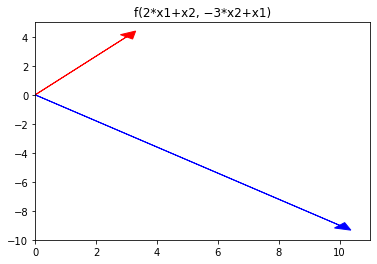

In [22]:
# Display that transformation visually.
plt.arrow(0,0, input_vector[0][0], input_vector[1][0],head_width=.5, head_length=0.5, color ='red')
plt.arrow(0,0, output_vector[0][0], output_vector[1][0],head_width=.5, head_length=0.5, color ='blue')
plt.xlim(0,11)          
plt.ylim(-10,5);
plt.title('f(2*x1+x2, −3*x2+x1)');

In [23]:
# What exactly is the take-away from all of this?
print('We can describe our function f as the product of any vector and T')

We can describe our function f as the product of any vector and T


In [24]:
# Wait. what?
print('We can describe any linear transformation as matrix vector multiplication.')

We can describe any linear transformation as matrix vector multiplication.


### 5. Eigenvalues and Eigenvectors

In [25]:
# Suppose we have a linear transformation (matrix T).
T = np.array([[-1, 3, -1], [-3,5,-1], [-3,3,1]])
T

array([[-1,  3, -1],
       [-3,  5, -1],
       [-3,  3,  1]])

In [26]:
# The numpy 'eig' function returns a tuple of two values.
w, v = np.linalg.eig(T)

In [27]:
# Tuple[0] contains the eigenvalues (one for each column).
print('evalues:')
w

evalues:


array([1., 2., 2.])

In [28]:
#  Tuple[1] contains the corresponding eigenvectors, as columns. 
print('eigenvectors:')
print(v)

eigenvectors:
[[-0.57735027 -0.10893917 -0.52206272]
 [-0.57735027  0.21459692 -0.68943695]
 [-0.57735027  0.97060827 -0.50212269]]


In [29]:
# To get the first eigenvector and its eigenvalue:
evector_0 = v[:,0]
evalue_0=w[0]
print(evector_0)
print(evalue_0)

[-0.57735027 -0.57735027 -0.57735027]
1.0000000000000022


In [30]:
# Dot product of matrix and first eigenvector:
np.dot(T, evector_0)

array([-0.57735027, -0.57735027, -0.57735027])

In [31]:
# Same as multiplying first eigenvalue and eigenvector:
evalue_0*evector_0

array([-0.57735027, -0.57735027, -0.57735027])

In [32]:
# Create a new matrix, with the eigenvalaues on the diagonal.
D=np.diag(w)
D

array([[1., 0., 0.],
       [0., 2., 0.],
       [0., 0., 2.]])

In [33]:
# Why is this important?
print('Eigenvalues and eigenvectors can be used to decompose any square matrix by diagonalizing it.')

Eigenvalues and eigenvectors can be used to decompose any square matrix by diagonalizing it.


In [34]:
# Okay, do this for any matrix.
P = np.random.randint(1,5,(3,3))
w, v = np.linalg.eig(P)
D=np.diag(w)
print(P)
print(D)

[[2 3 3]
 [1 4 4]
 [2 3 2]]
[[ 8.04705506  0.          0.        ]
 [ 0.          0.76507811  0.        ]
 [ 0.          0.         -0.81213318]]


More info [here](https://www.math.ubc.ca/~pwalls/math-python/linear-algebra/eigenvalues-eigenvectors) about how to use eigenvalues to diagonalize a matrix.

### 6. The Curse of Dimensionality

In [83]:
# What is the curse of dimensionality?
print('When your data has too many features.')

When your data has too many features.


In [59]:
# Make a dataframe of 50 points
df = pd.DataFrame({'x':np.random.randint(0, 100, 50)})

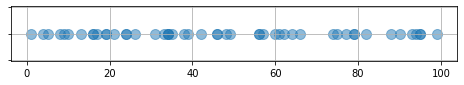

In [64]:
# Plot the floats on a one-dimensional number line
fig, ax = plt.subplots(figsize=(8,1))
ax.grid()
ax.set_yticklabels([])
plt.scatter(df['x'], np.zeros(50), s=100, alpha=0.5);

In [66]:
# Add a y column
df['y'] = pd.DataFrame({'x':np.random.randint(0, 100, 50)})
df.head()

,x,y
0,39,39
1,16,54
2,33,1
3,46,78
4,62,32


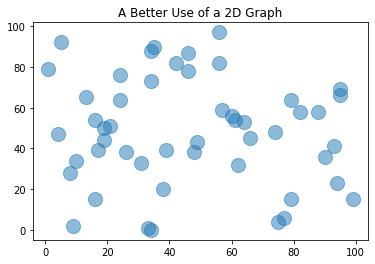

In [70]:
# Graph 2D data on a 2D plot
plt.scatter(df['x'], df['y'], alpha=0.5, s=200)
plt.title("A Better Use of a 2D Graph");

In [71]:
# Add a z column
df['z'] = pd.DataFrame({'x':np.random.randint(0, 100, 50)})
df.head()

,x,y,z
0,39,39,20
1,16,54,68
2,33,1,99
3,46,78,47
4,62,32,29


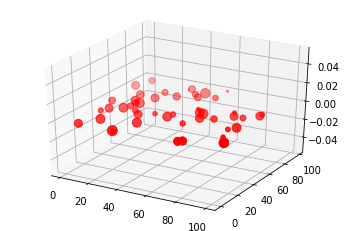

In [82]:
# Graph 3-Dimensional Data 
from mpl_toolkits.mplot3d import Axes3D
plt.figure().gca(projection='3d')
plt.scatter(df['x'], df['y'], df['z'], color='r')
plt.show()

### 7. Principal Component Analysis

In [30]:
# load the Wisconsin Breast Cancer dataset
url='https://raw.githubusercontent.com/austinlasseter/DS-Unit-1-Sprint-3-Linear-Algebra/master/module3-dimensionality-reduction/cancer.csv'
cancer=pd.read_csv(url)
cancer.head()
cols=list(cancer.columns)
cancer.columns=cols[-1:] + cols[:-1]
cancer.head()


,malignant,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


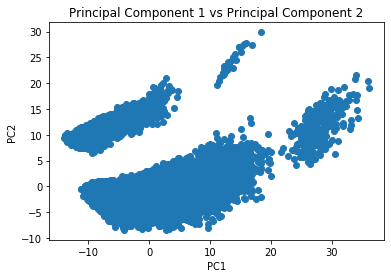

In [630]:
plt.scatter(transformed_data[:,0], transformed_data[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Principal Component 1 vs Principal Component 2")
plt.show()